In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Oasis Infobyte\Advertising.csv", index_col = 'Unnamed: 0')
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df =  df.rename(columns = {'Unnamed: 0': 'Sr.No'})
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### EDA

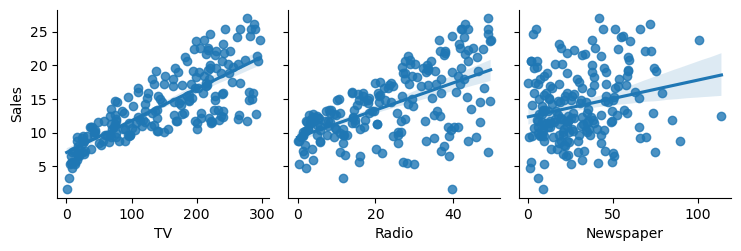

In [36]:
# Pairplot to see relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', palette = 'Set2')
plt.show()

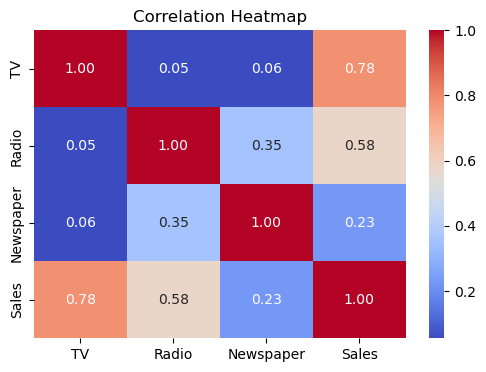

In [37]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# 4. Features & Target
X = df[['TV', 'Radio', 'Newspaper']]   # Independent variables
y = df['Sales']                        # Dependent variable


In [39]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [40]:
# 6. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# 7. Predictions & Evaluation


y_pred = model.predict(X_test)

print("\n📊 Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


📊 Model Evaluation:
R² Score: 0.8994380241009121
RMSE: 1.7815996615334495


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


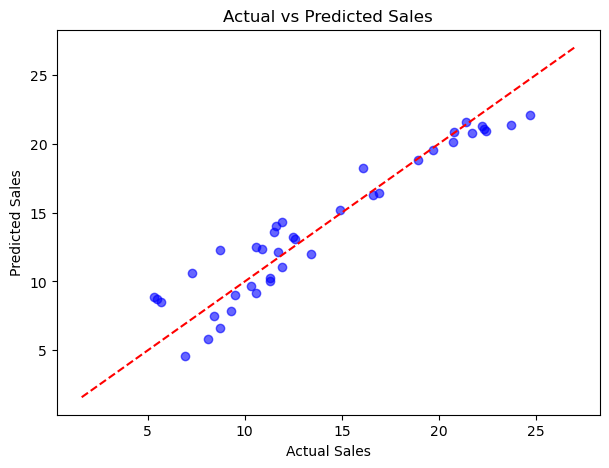

In [42]:
# 8. Visualization of Predictions


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # line y=x
plt.show()

In [43]:
# 9. Model Coefficients

coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nModel Coefficients:")
print(coef_df)


Model Coefficients:
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761
